In [36]:
import os
from registration_framework import Registration
from pso_optim import PSO_optim
from cmaes_optim import CMAES
from utils.tools import Tools
os.environ['KMP_DUPLICATE_LIB_OK']='True'

config = Tools.load_yaml_config("config.yaml")
res_path = f"{config.data_save_path}/{config.record_id}"
file_name = f"{config.record_id}_config.yaml"
Tools.save_obj_yaml(res_path, file_name, config)

registration = Registration(config)
optim = PSO_optim(config)
# optim = CMAES(config)
registration.set_optim_algorithm(optim)

RUN_TIMES = 1

# 最好是迭代多次选最优
for i in range(RUN_TIMES):
    # optim.run_matched_with_loops()
    result = registration.registrate()
    config.repeat_count += 1

H_Refer: 1.1454729425899004
iterations: 0, fitness: 0.2878787878787879, weighted_sp: 0, params: tensor([ 15.5089, 129.2675,  52.4270])
iterations: 1, fitness: 0.31648715824357915, weighted_sp: 0, params: tensor([ 17.8647, 130.1916,  53.3754])
iterations: 2, fitness: 0.32263242375601925, weighted_sp: 0, params: tensor([ 19.8557, 130.9454,  54.1021])
iterations: 3, fitness: 0.3229166666666667, weighted_sp: 0, params: tensor([  5.7963, 132.9114,  12.1905])
iterations: 4, fitness: 0.3229166666666667, weighted_sp: 0, params: tensor([  5.7963, 132.9114,  12.1905])
iterations: 5, fitness: 0.3229166666666667, weighted_sp: 0, params: tensor([  5.7963, 132.9114,  12.1905])
iterations: 6, fitness: 0.3229166666666667, weighted_sp: 0, params: tensor([  5.7963, 132.9114,  12.1905])
iterations: 7, fitness: 0.3229166666666667, weighted_sp: 0, params: tensor([  5.7963, 132.9114,  12.1905])
iterations: 8, fitness: 0.3410620792819746, weighted_sp: 0, params: tensor([ 11.3820, 142.7314,  16.3893])
iterati

: 

In [2]:
import numpy as np
# 对于重采样的重新处理，旋转角度不需要操作的
crop_x, crop_y = result[-1][0].item(), result[-1][1].item()
rot = result[-1][-1].item()
downsample_times = registration.config.downsample_times
height, width = registration.get_referred_img_shape()
rect = np.array([crop_x, crop_y, width, height]) * downsample_times
# 1. 获取在原始大小遮罩CT图像的mask结果
result_mask_ct_matched = Tools.rotate_and_crop_img(registration.msk_img_ori, rot, rect)
# 2. 获取在原始大小下CT图像的结果
result_ct_matched = Tools.rotate_and_crop_img(registration.mov_img_ori, rot, rect)

file_path = Tools.get_save_path(registration.config)
mask_file_name = f"1Aa-mask_matched.bmp"
ct_file_name = f"1Aa-ct_matched.bmp"
Tools.save_img(file_path, ct_file_name, result_ct_matched)
Tools.save_img(file_path, mask_file_name, result_mask_ct_matched)

In [ ]:
# 贝叶斯算法超参数sigma0, pop_size调整

import os, copy
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

os.environ['KMP_DUPLICATE_LIB_OK']='True'

space = [
    Integer(2, 4, name="run_times"),
]

def cma_run(run_times):
    config_ = copy.deepcopy(config)
    cma = CMAES(config_)
    registration.set_optim_algorithm(cma)

    for i in range(run_times):
        cma.run()
    return cma.best_value

@use_named_args(space)
def objective(run_times):
    # 初始化PSO算法
    best_cost = cma_run(run_times)
    # 执行PSO
    # best_solution, best_cost = pso.run(max_iter=100)
    # 返回PSO运行结果，这里以最优成本作为需要最小化的指标
    print("iteration finished.")
    return best_cost

# 执行贝叶斯优化
result = gp_minimize(objective, space, n_calls=10, random_state=0)

# 输出最佳参数
print("Best parameters: runtimes = {:.2f}".format(result.x[0]))
print("Best objective value: {:.4f}".format(result.fun))


(<Axes: title={'center': 'reg_img'}>,
 Text(0.5, 1.0, 'reg_img'))

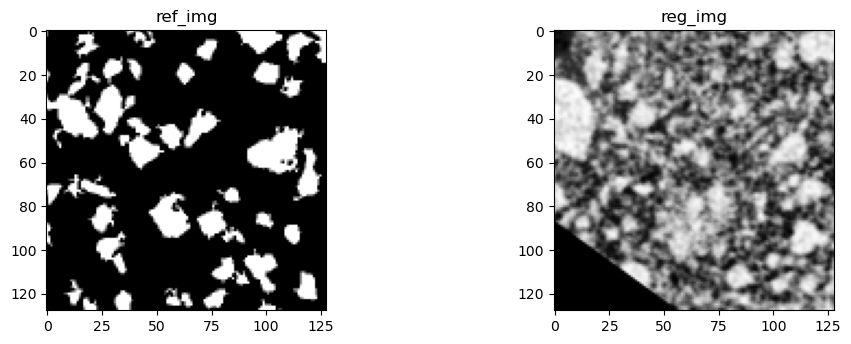

In [45]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


ref_img = registration.refered_img
# reg_img = result[1]
reg_img = res_img


# sp = registration.spatial_correlation(ref_img, res_img)
# print(f"spatial information: {sp}")

# Display the images
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.imshow(ref_img, cmap='gray', vmin=0, vmax=255), plt.title('ref_img')
plt.subplot(2, 2, 2), plt.imshow(reg_img, cmap='gray', vmin=0, vmax=255), plt.title('reg_img')


